# Connect to BigQuery & Fetch Data

In [16]:
from google.cloud import bigquery
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [23]:
# Initialize BigQuery client

PROJECT_ID = "project-portfolio-473015"   # replace with your project ID
DATASET = 'stock_data_append'

client = bigquery.Client(project=PROJECT_ID)

In [24]:
# Queries
query_stock = f"""
    SELECT *
    FROM `{PROJECT_ID}.{DATASET}.stock_daily`
    ORDER BY ts
"""

In [25]:
query_news = f"""
    SELECT *
    FROM `{PROJECT_ID}.{DATASET}.stock_news`
    ORDER BY published_utc
"""

In [6]:
# List columns in your table
table = client.get_table("project-portfolio-473015.stock_data_append.stock_daily")
print([field.name for field in table.schema])


['symbol', 'ts', 'open', 'high', 'low', 'close', 'volume', 'vwap', 'trades_count']


In [7]:
# List columns in your table
table = client.get_table("project-portfolio-473015.stock_data_append.stock_news")
print([field.name for field in table.schema])


['id', 'title', 'author', 'description', 'article_url', 'amp_url', 'image_url', 'published_utc', 'publisher', 'tickers', 'keywords', 'insights']


In [26]:
# Load into Pandas
df_stock = client.query(query_stock).to_dataframe()


In [27]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   symbol        82 non-null     object             
 1   ts            82 non-null     datetime64[us, UTC]
 2   open          82 non-null     float64            
 3   high          82 non-null     float64            
 4   low           82 non-null     float64            
 5   close         82 non-null     float64            
 6   volume        82 non-null     float64            
 7   vwap          82 non-null     float64            
 8   trades_count  82 non-null     Int64              
dtypes: Int64(1), datetime64[us, UTC](1), float64(6), object(1)
memory usage: 6.0+ KB


In [28]:
# Load into Pandas

df_news = client.query(query_news).to_dataframe()

c:\Users\farhan\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\cloud\bigquery\table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [29]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   id             1165 non-null   object             
 1   title          1165 non-null   object             
 2   author         1165 non-null   object             
 3   description    1165 non-null   object             
 4   article_url    1165 non-null   object             
 5   amp_url        217 non-null    object             
 6   image_url      1165 non-null   object             
 7   published_utc  1165 non-null   datetime64[us, UTC]
 8   publisher      1165 non-null   object             
 9   tickers        1165 non-null   object             
 10  keywords       1165 non-null   object             
 11  insights       1165 non-null   object             
dtypes: datetime64[us, UTC](1), object(11)
memory usage: 109.3+ KB


In [30]:
print("Stock shape:", df_stock.shape)
print("News shape:", df_news.shape)

Stock shape: (82, 9)
News shape: (1165, 12)


In [31]:
num_duplicates = df_stock.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 0


In [33]:

df_news.duplicated(subset=['id']).sum()

np.int64(211)

In [11]:
print(df_stock.isnull().sum())
print(df_news.isnull().sum())

# Remove duplicates
df_stock = df_stock.drop_duplicates(subset=['symbol', 'ts'])
df_news = df_news.drop_duplicates(subset=['id'])


symbol          0
ts              0
open            0
high            0
low             0
close           0
volume          0
vwap            0
trades_count    0
dtype: int64
id                 0
title              0
author             0
description        0
article_url        0
amp_url          752
image_url          0
published_utc      0
publisher          0
tickers            0
keywords           0
insights           0
dtype: int64


Quick Data Cleaning

In [13]:
df_stock['ts'] = pd.to_datetime(df_stock['ts'])
df_news['published_utc'] = pd.to_datetime(df_news['published_utc'])


In [14]:
print("Stock shape:", df_stock.shape)
print("News shape:", df_news.shape)

Stock shape: (41, 9)
News shape: (719, 12)


In [128]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   symbol        41 non-null     object             
 1   ts            41 non-null     datetime64[us, UTC]
 2   open          41 non-null     float64            
 3   high          41 non-null     float64            
 4   low           41 non-null     float64            
 5   close         41 non-null     float64            
 6   volume        41 non-null     float64            
 7   vwap          41 non-null     float64            
 8   trades_count  41 non-null     Int64              
dtypes: Int64(1), datetime64[us, UTC](1), float64(6), object(1)
memory usage: 3.1+ KB


In [129]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   id             719 non-null    object             
 1   title          719 non-null    object             
 2   author         719 non-null    object             
 3   description    719 non-null    object             
 4   article_url    719 non-null    object             
 5   amp_url        155 non-null    object             
 6   image_url      719 non-null    object             
 7   published_utc  719 non-null    datetime64[us, UTC]
 8   publisher      719 non-null    object             
 9   tickers        719 non-null    object             
 10  keywords       719 non-null    object             
 11  insights       719 non-null    object             
dtypes: datetime64[us, UTC](1), object(11)
memory usage: 67.5+ KB


# Stock Data Analysis

In [130]:
# Daily returns
df_stock['daily_return'] = df_stock['close'].pct_change() * 100

In [131]:
# Volatility
df_stock['volatility_pct'] = (df_stock['high'] - df_stock['low']) / df_stock['open'] * 100

In [132]:
# Rolling averages
df_stock['rolling_7d'] = df_stock['close'].rolling(7).mean()
df_stock['rolling_30d'] = df_stock['close'].rolling(30).mean()

In [133]:
print(df_stock[['ts','close','daily_return','volatility_pct']].head())

                         ts   close  daily_return  volatility_pct
0 2025-07-28 04:00:00+00:00  176.75           NaN        1.741179
1 2025-07-29 04:00:00+00:00  175.51     -0.701556        2.449989
2 2025-07-30 04:00:00+00:00  179.27      2.142328        2.181180
3 2025-07-31 04:00:00+00:00  177.87     -0.780945        4.029524
4 2025-08-01 04:00:00+00:00  173.72     -2.333165        3.245448


In [134]:
df_stock.head()

,symbol,ts,open,high,low,close,volume,vwap,trades_count,daily_return,volatility_pct,rolling_7d,rolling_30d
0,NVDA,2025-07-28 04:00:00+00:00,174.02,177.00,173.97,176.75,140023521.0,175.5154,1198494,NaN,1.741179,NaN,NaN
1,NVDA,2025-07-29 04:00:00+00:00,177.96,179.38,175.02,175.51,154077512.0,177.0364,1429004,-0.701556,2.449989,NaN,NaN
2,NVDA,2025-07-30 04:00:00+00:00,176.51,179.89,176.04,179.27,174312208.0,178.8640,1587077,2.142328,2.181180,NaN,NaN
3,NVDA,2025-07-31 04:00:00+00:00,182.90,183.30,175.93,177.87,221685446.0,179.6528,1998696,-0.780945,4.029524,NaN,NaN
4,NVDA,2025-08-01 04:00:00+00:00,174.09,176.54,170.89,173.72,204528985.0,173.8656,2249947,-2.333165,3.245448,NaN,NaN


In [77]:
df_news.head()

,id,title,author,description,article_url,amp_url,image_url,published_utc,publisher,tickers,keywords,insights,date
0,f34a895c3ff739ded422ecf19345df21155b517121ceee...,The Best Artificial Intelligence (AI) Stock to...,Brett Schafer,The article highlights Alphabet as the top AI ...,https://www.fool.com/investing/2025/07/26/the-...,None,https://g.foolcdn.com/editorial/images/826102/...,2025-07-26 07:15:00+00:00,"{'name': 'The Motley Fool', 'homepage_url': 'h...","[GOOG, GOOGL, NVDA, MSFT]","[AI, stock market, technology, cloud computing...","[{'ticker': 'GOOG', 'sentiment': 'positive', '...",2025-07-26
1,f31295cfcb70bbcf0fdae748ac23fbd914abe2461001cc...,Where Will Palantir Stock Be in 5 Years?,Will Ebiefung,Palantir Technologies has seen significant sto...,https://www.fool.com/investing/2025/07/26/wher...,None,https://g.foolcdn.com/editorial/images/826049/...,2025-07-26 08:03:00+00:00,"{'name': 'The Motley Fool', 'homepage_url': 'h...","[PLTR, NVDA]","[AI, big data, stock analysis, technology, def...","[{'ticker': 'PLTR', 'sentiment': 'negative', '...",2025-07-26
2,ba0e1f4e17d58d4664e26229e6d3760bbdc8556bbb6aa3...,2 Unstoppable Vanguard ETFs That Consistently ...,Anthony Di Pizio,Two Vanguard ETFs (Growth and Mega Cap Growth)...,https://www.fool.com/investing/2025/07/26/2-va...,None,https://g.foolcdn.com/editorial/images/826245/...,2025-07-26 09:07:00+00:00,"{'name': 'The Motley Fool', 'homepage_url': 'h...","[VUG, MGK, NVDA, MSFT]","[ETF, technology stocks, investment, market pe...","[{'ticker': 'VUG', 'sentiment': 'positive', 's...",2025-07-26
3,def61cbcfe0ab09821d54295897dad6369a4b4b7cf2cc2...,Where Will Palantir Technologies Be in 3 Years?,Justin Pope,Palantir Technologies has experienced remarkab...,https://www.fool.com/investing/2025/07/26/wher...,None,https://g.foolcdn.com/editorial/images/825127/...,2025-07-26 09:10:00+00:00,"{'name': 'The Motley Fool', 'homepage_url': 'h...","[PLTR, SNOW, NVDA]","[Artificial Intelligence, AI, Stock Market, Te...","[{'ticker': 'PLTR', 'sentiment': 'negative', '...",2025-07-26
4,3ab8d5baf52cab43fb7bf1645a5487f8276262a29cc24e...,This Artificial Intelligence (AI) Stock Has Bi...,Ryan Vanzo,Nvidia is a dominant AI GPU manufacturer with ...,https://www.fool.com/investing/2025/07/26/ai-a...,None,https://g.foolcdn.com/editorial/images/824586/...,2025-07-26 12:30:00+00:00,"{'name': 'The Motley Fool', 'homepage_url': 'h...","[NVDA, INTC]","[AI, GPU, technology, stock market, investment]","[{'ticker': 'NVDA', 'sentiment': 'positive', '...",2025-07-26


In [135]:
duplicate_count_all = df_stock.duplicated().sum()
print("Total duplicate rows (all columns):", duplicate_count_all)


Total duplicate rows (all columns): 0


Stock Price EDA

In [136]:
# Price Trend

import plotly.graph_objects as go

# Ensure datetime is correct
df_stock['ts'] = pd.to_datetime(df_stock['ts'])

fig = go.Figure(data=[go.Candlestick(
    x=df_stock['ts'],
    open=df_stock['open'],
    high=df_stock['high'],
    low=df_stock['low'],
    close=df_stock['close'],
    increasing_line_color='green',
    decreasing_line_color='red',
    name='NVDA'
)])

fig.update_layout(
    title='NVDA Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False
)

fig.show()



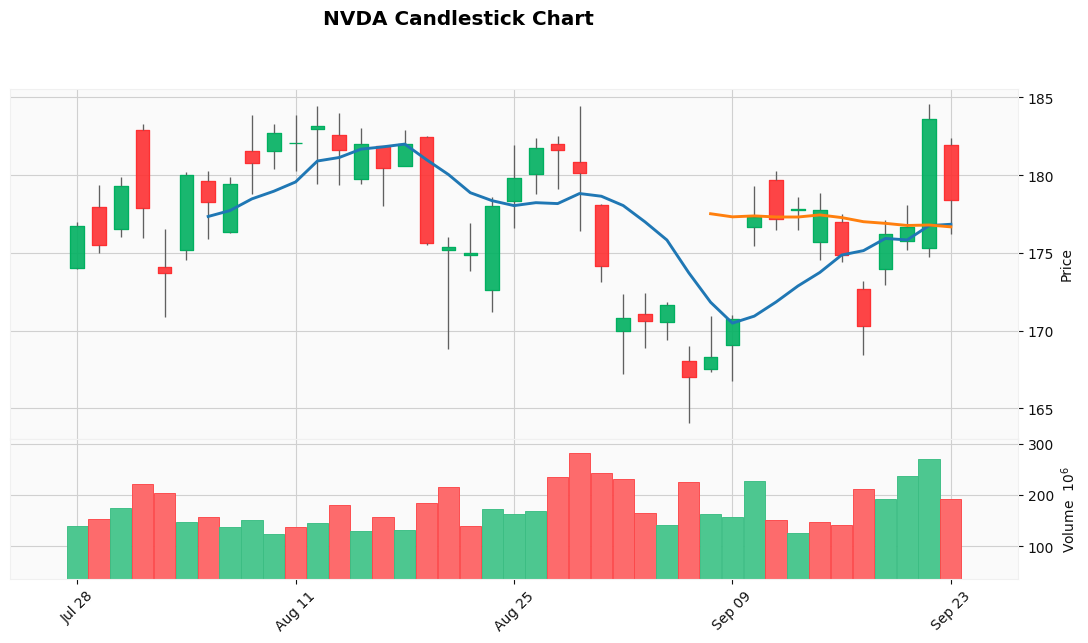

In [137]:
import mplfinance as mpf

# Prepare DataFrame
df_plot = df_stock.set_index('ts')[['open','high','low','close','volume']]

mpf.plot(df_plot,
         type='candle',
         style='yahoo',
         volume=True,
         title='NVDA Candlestick Chart',
         mav=(7,30),  # optional moving averages
         figsize=(14,7))


Daily Returns & Volatility

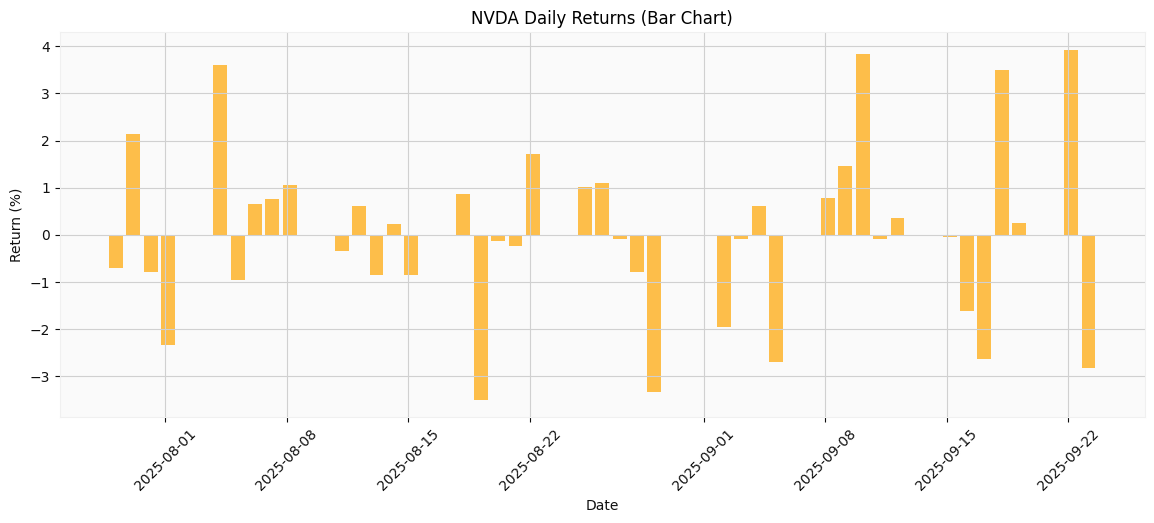

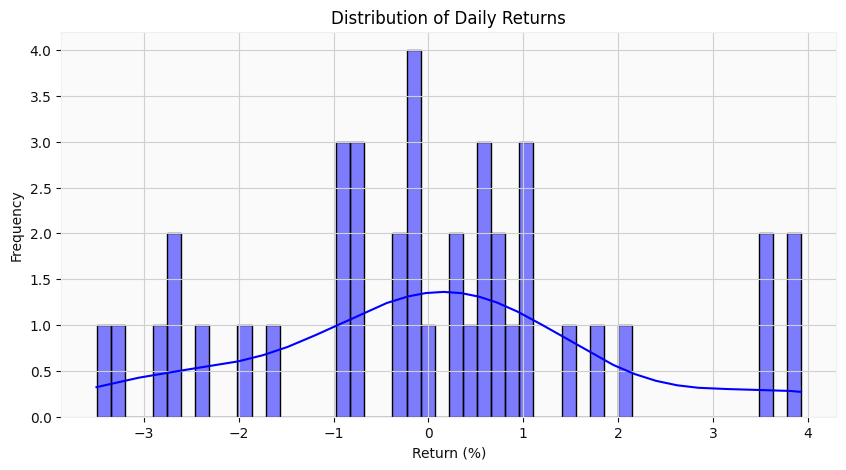

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for daily returns
plt.figure(figsize=(14,5))
plt.bar(df_stock['ts'], df_stock['daily_return'], color='orange', alpha=0.7)
plt.title('NVDA Daily Returns (Bar Chart)')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.xticks(rotation=45)
plt.show()

# Histogram of returns
plt.figure(figsize=(10,5))
sns.histplot(df_stock['daily_return'].dropna(), bins=50, kde=True, color='blue')
plt.title('Distribution of Daily Returns')
plt.xlabel('Return (%)')
plt.ylabel('Frequency')
plt.show()

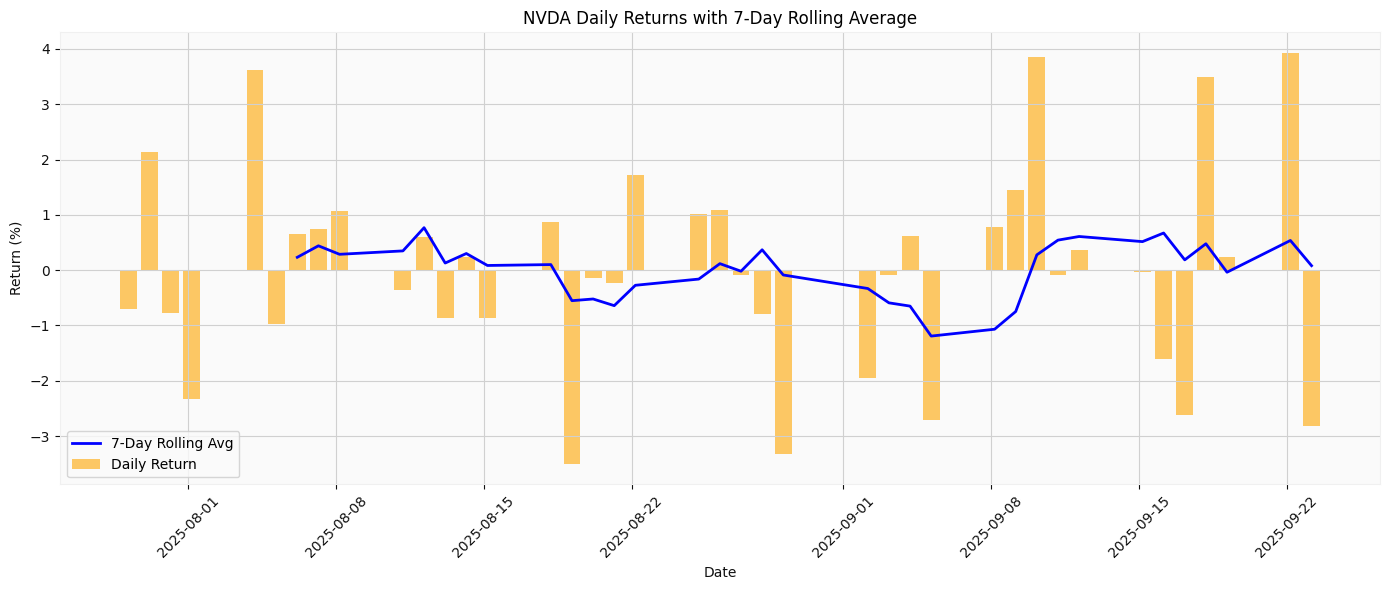

In [139]:
# combined bar + moving average line chart for stock daily returns.

import matplotlib.pyplot as plt
import pandas as pd

# Calculate 7-day rolling average of daily returns
df_stock['rolling_7d_return'] = df_stock['daily_return'].rolling(window=7).mean()

plt.figure(figsize=(14,6))

# Bar chart for daily returns
plt.bar(df_stock['ts'], df_stock['daily_return'], color='orange', alpha=0.6, label='Daily Return')

# Line chart for 7-day rolling average
plt.plot(df_stock['ts'], df_stock['rolling_7d_return'], color='blue', linewidth=2, label='7-Day Rolling Avg')

plt.title('NVDA Daily Returns with 7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Volume and VWAP Trends

In [140]:
# Candlestick chart with daily OHLC prices and overlay VWAP

import plotly.graph_objects as go

# Create candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=df_stock['ts'],
    open=df_stock['open'],
    high=df_stock['high'],
    low=df_stock['low'],
    close=df_stock['close'],
    name='Price'
)])

# Add VWAP as a line
fig.add_trace(go.Scatter(
    x=df_stock['ts'],
    y=df_stock['vwap'],
    mode='lines',
    line=dict(color='brown', width=2),
    name='VWAP'
))

# Update layout
fig.update_layout(
    title='NVDA Daily Price and VWAP',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,
    template='plotly_dark'
)

fig.show()


In [141]:
# Combined candlestick + VWAP + volume chart using Plotly

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplot with 2 rows: row 1 for candlestick+VWAP, row 2 for volume
fig = make_subplots(rows=2, cols=1, 
                    shared_xaxes=True, 
                    row_heights=[0.7, 0.3],
                    vertical_spacing=0.02)

# Candlestick for daily OHLC
fig.add_trace(go.Candlestick(
    x=df_stock['ts'],
    open=df_stock['open'],
    high=df_stock['high'],
    low=df_stock['low'],
    close=df_stock['close'],
    name='Price'
), row=1, col=1)

# VWAP line
fig.add_trace(go.Scatter(
    x=df_stock['ts'],
    y=df_stock['vwap'],
    mode='lines',
    line=dict(color='brown', width=2),
    name='VWAP'
), row=1, col=1)

# Volume bars
fig.add_trace(go.Bar(
    x=df_stock['ts'],
    y=df_stock['volume'],
    marker_color='purple',
    name='Volume'
), row=2, col=1)

# Layout settings
fig.update_layout(
    title='NVDA Daily Price, VWAP, and Volume',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis2_title='Date',
    yaxis2_title='Volume',
    xaxis_rangeslider_visible=False,
    template='plotly_dark',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

fig.show()


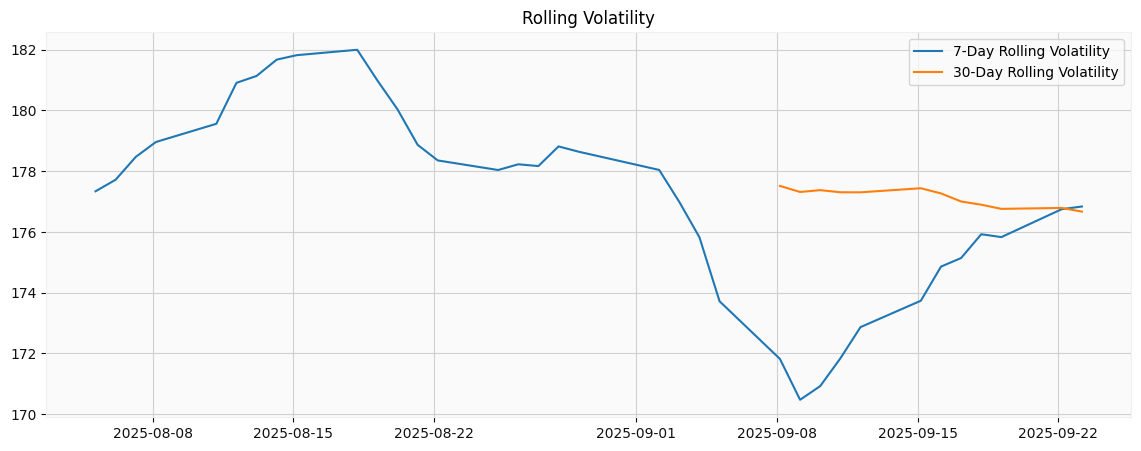

In [142]:
# Rolling Metrics

# Already have rolling_7d and rolling_30d in df_stock
plt.figure(figsize=(14,5))
plt.plot(df_stock['ts'], df_stock['rolling_7d'], label='7-Day Rolling Volatility')
plt.plot(df_stock['ts'], df_stock['rolling_30d'], label='30-Day Rolling Volatility')
plt.title('Rolling Volatility')
plt.legend()
plt.show()


News EDA

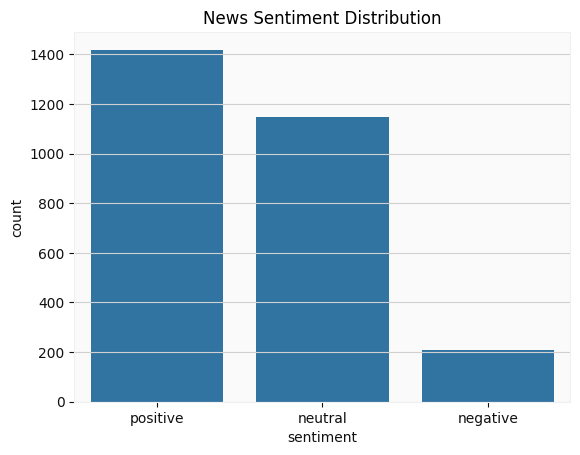

In [163]:
# Sentiment distribution

# Flatten insights into separate rows
news_expanded = df_news.explode('insights').reset_index(drop=True)

# Safely extract sentiment and ticker
news_expanded['sentiment'] = news_expanded['insights'].apply(lambda x: x.get('sentiment') if isinstance(x, dict) else np.nan)
news_expanded['ticker'] = news_expanded['insights'].apply(lambda x: x.get('ticker') if isinstance(x, dict) else np.nan)

# Drop rows with missing sentiment
news_expanded = news_expanded.dropna(subset=['sentiment'])

# Ensure sentiment column has correct order
sentiment_order = ['positive', 'neutral', 'negative']

# Countplot
sns.countplot(data=news_expanded, x='sentiment', order=sentiment_order)
plt.title('News Sentiment Distribution')
plt.show()


Plot daily stock prices with markers for news events and show sentiment scores in the tooltip.

In [165]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# --- Map sentiment to numeric score ---
sentiment_map = {"positive": 1, "neutral": 0, "negative": -1}
news_expanded['sentiment_score'] = news_expanded['sentiment'].map(sentiment_map)

# --- Aggregate daily sentiment for NVDA ---
news_expanded['date'] = pd.to_datetime(news_expanded['published_utc']).dt.date
daily_sentiment = (
    news_expanded[news_expanded['ticker'] == 'NVDA']
    .groupby('date')['sentiment_score']
    .sum()  # sum multiple news per day
    .reset_index()
)

# --- Prepare stock data ---
df_stock['date'] = df_stock['ts'].dt.date
merged = pd.merge(df_stock, daily_sentiment, on='date', how='left').fillna({'sentiment_score': 0})

# --- Plot Candlestick ---
fig = go.Figure(data=[go.Candlestick(
    x=merged['ts'],
    open=merged['open'],
    high=merged['high'],
    low=merged['low'],
    close=merged['close'],
    name='Price'
)])

# --- Add sentiment markers ---
fig.add_trace(go.Scatter(
    x=merged['ts'],
    y=merged['close'] + 2,  # slightly above the candlestick
    mode='markers',
    marker=dict(
        size=10,
        color=['green' if s > 0 else 'red' if s < 0 else 'gray' for s in merged['sentiment_score']],
        symbol='diamond'
    ),
    hovertext=['Sentiment Score: {}'.format(s) for s in merged['sentiment_score']],
    name='News Sentiment'
))

# --- Layout tweaks ---
fig.update_layout(
    title='NVDA Daily Price with News Sentiment Overlay',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False,
    hovermode='x unified'
)

fig.show()


We can enrich the tooltip to show both the net sentiment score and the number of news items for the stock per day.

In [166]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# --- Map sentiment to numeric score ---
sentiment_map = {"positive": 1, "neutral": 0, "negative": -1}
news_expanded['sentiment_score'] = news_expanded['sentiment'].map(sentiment_map)

# --- Aggregate daily sentiment and count of news for NVDA ---
news_expanded['date'] = pd.to_datetime(news_expanded['published_utc']).dt.date
daily_sentiment = (
    news_expanded[news_expanded['ticker'] == 'NVDA']
    .groupby('date')
    .agg(
        sentiment_score=('sentiment_score', 'sum'),
        news_count=('sentiment_score', 'count')
    )
    .reset_index()
)

# --- Prepare stock data ---
df_stock['date'] = df_stock['ts'].dt.date
merged = pd.merge(df_stock, daily_sentiment, on='date', how='left').fillna({'sentiment_score': 0, 'news_count': 0})

# --- Plot Candlestick ---
fig = go.Figure(data=[go.Candlestick(
    x=merged['ts'],
    open=merged['open'],
    high=merged['high'],
    low=merged['low'],
    close=merged['close'],
    name='Price'
)])

# --- Add sentiment markers ---
fig.add_trace(go.Scatter(
    x=merged['ts'],
    y=merged['close'] + 2,  # slightly above the candlestick
    mode='markers',
    marker=dict(
        size=10,
        color=['green' if s > 0 else 'red' if s < 0 else 'gray' for s in merged['sentiment_score']],
        symbol='diamond'
    ),
    hovertext=[
        f"Sentiment Score: {s}<br>News Count: {c}"
        for s, c in zip(merged['sentiment_score'], merged['news_count'])
    ],
    name='News Sentiment'
))

# --- Layout tweaks ---
fig.update_layout(
    title='NVDA Daily Price with News Sentiment Overlay',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False,
    hovermode='x unified'
)

fig.show()


Annotating the chart with the actual news headlines so you can hover over the marker and see the top news for that day.

In [167]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# --- Map sentiment to numeric score ---
sentiment_map = {"positive": 1, "neutral": 0, "negative": -1}
news_expanded['sentiment_score'] = news_expanded['sentiment'].map(sentiment_map)

# --- Aggregate daily sentiment and collect news headlines for NVDA ---
news_expanded['date'] = pd.to_datetime(news_expanded['published_utc']).dt.date
daily_sentiment = (
    news_expanded[news_expanded['ticker'] == 'NVDA']
    .groupby('date')
    .agg(
        sentiment_score=('sentiment_score', 'sum'),
        news_count=('sentiment_score', 'count'),
        headlines=('title', lambda x: "<br>".join(x))  # concatenate all headlines for the day
    )
    .reset_index()
)

# --- Prepare stock data ---
df_stock['date'] = df_stock['ts'].dt.date
merged = pd.merge(df_stock, daily_sentiment, on='date', how='left').fillna({
    'sentiment_score': 0, 
    'news_count': 0, 
    'headlines': 'No news'
})

# --- Plot Candlestick ---
fig = go.Figure(data=[go.Candlestick(
    x=merged['ts'],
    open=merged['open'],
    high=merged['high'],
    low=merged['low'],
    close=merged['close'],
    name='Price'
)])

# --- Add sentiment markers with headlines in tooltip ---
fig.add_trace(go.Scatter(
    x=merged['ts'],
    y=merged['close'] + 2,
    mode='markers',
    marker=dict(
        size=10,
        color=['green' if s > 0 else 'red' if s < 0 else 'gray' for s in merged['sentiment_score']],
        symbol='diamond'
    ),
    hovertext=[
        f"Sentiment Score: {s}<br>News Count: {c}<br>Headlines:<br>{h}"
        for s, c, h in zip(merged['sentiment_score'], merged['news_count'], merged['headlines'])
    ],
    name='News Sentiment'
))

# --- Layout tweaks ---
fig.update_layout(
    title='NVDA Daily Price with News Sentiment & Headlines Overlay',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False,
    hovermode='x unified'
)

fig.show()
